# Preprocessing

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/My Drive/HW4/training.csv')
df=df.drop(columns='level_0')

In [17]:
df.head()

,Id,orderID,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returned
0,0,637025,721,2,14,2.0,1,29.99,29.99,54.0,5.0,396,2,BPRG,0
1,1,657321,2805,263,23,12.0,1,5.00,17.99,551.0,25.0,30246,2,KGRG,0
2,2,416908,2061,1,12,8.0,1,20.00,39.99,0.0,0.0,46637,2,BPRG,1
3,3,355957,1136,43,16,3.0,1,39.99,39.99,0.0,0.0,48091,5,BPRG,0
4,4,455265,1799,78,15,7.0,1,20.00,39.99,0.0,0.0,47918,2,CBA,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Id             400000 non-null  int64  
 1   orderID        400000 non-null  int64  
 2   articleID      400000 non-null  int64  
 3   colorCode      400000 non-null  int64  
 4   sizeCode       400000 non-null  int64  
 5   productGroup   399977 non-null  float64
 6   quantity       400000 non-null  int64  
 7   price          400000 non-null  float64
 8   rrp            399977 non-null  float64
 9   voucherID      400000 non-null  float64
 10  voucherAmount  400000 non-null  float64
 11  customerID     400000 non-null  int64  
 12  deviceID       400000 non-null  int64  
 13  paymentMethod  400000 non-null  object 
 14  returned       400000 non-null  int64  
dtypes: float64(5), int64(9), object(1)
memory usage: 45.8+ MB


In [4]:
df['paymentMethod'].unique()

array(['BPRG', 'KGRG', 'CBA', 'PAYPALVC', 'KKE', 'VORAUS', 'BPPL', 'NN',
       'BPLS'], dtype=object)

In [9]:
print('There are', len(df['articleID'].unique()), 'unique articles')

There are 3721 unique articles


In [15]:
df[df['articleID'] == 3822]  #all the missing values are in the rows with articleID 3822, and they all have colorCode 545 and sizeCode 22

,Id,orderID,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returned
30427,30427,300033,3822,545,22,NaN,1,25.0,NaN,281.0,0.0,32107,2,BPRG,0
57290,57290,598529,3822,545,22,NaN,1,25.0,NaN,614.0,0.0,17348,2,BPRG,0
58016,58016,37215,3822,545,22,NaN,1,100.0,NaN,159.0,0.0,49954,2,PAYPALVC,0
69583,69583,326551,3822,545,22,NaN,1,25.0,NaN,352.0,0.0,32593,3,PAYPALVC,0
76454,76454,52909,3822,545,22,NaN,1,25.0,NaN,170.0,0.0,42106,3,PAYPALVC,0
81599,81599,214269,3822,545,22,NaN,1,25.0,NaN,72.0,0.0,5010,2,BPRG,0
93858,93858,717441,3822,545,22,NaN,1,50.0,NaN,118.0,0.0,23125,5,CBA,0
95711,95711,205994,3822,545,22,NaN,1,25.0,NaN,229.0,0.0,34493,2,BPRG,0
96128,96128,325638,3822,545,22,NaN,1,25.0,NaN,351.0,0.0,18301,3,CBA,0
105463,105463,607422,3822,545,22,NaN,1,50.0,NaN,622.0,0.0,11153,2,BPRG,0


In [16]:

print('rrp values in rows with color code 545 and size code 22:',df[(df['colorCode']==545) & (df['sizeCode']==22)]['rrp'].unique()) 
#the rrp value in these rows are 0 so best thing we can do is to fill the missing rrp values also with 0.
print('Unique productGroup values:',df['productGroup'].unique())
print()
# And for the prductGroup column we can use the number 17 to fill the mising values, because this column has integer values from 0-17, and it 17 has only one row, so it doesn't make much sense to create a new value.

rrp values in rows with color code 545 and size code 22: [ 0. nan]
Unique productGroup values: [ 2. 12.  8.  3.  7.  0.  9. 10.  6.  4. 14.  1. 15.  5. 11. 16. nan 17.]



In [19]:
df['productGroup'] = df['productGroup'].fillna(17)
df['rrp'] = df['rrp'].fillna(0)
df['productGroup'] = df['productGroup'].astype('int') 

# Average price of returned articles

In this barplot we see the relation between the price of an order position and the return of that article. 

The price of an position is calculated as follows:

 price = quantity*rrp-D  ,
 
  where D consist of a discount to an article or any other reduction in the article price. 

In average returned articles had a higher price, which can have numerous reasons, such as: they ordered multiple amounts of the same article, but only wanted to keep one of them; customers are more picky for expensive articles etc. 

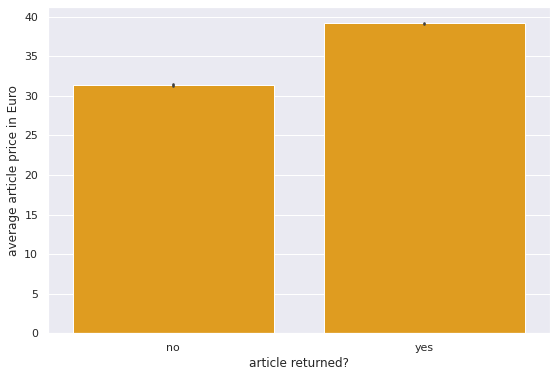

In [20]:
sns.set(rc = {'figure.figsize':(9,6)})
ax=sns.barplot(x='returned',y = 'price',data=df,palette = ['orange'],)
ax.set_xticklabels(['no','yes'])
plt.xlabel('article returned?')
plt.ylabel('average article price in Euro')
plt.show()

#Influence of payment methods and vouchers to returns 

In [ ]:
df['Used voucher?'] = df['voucherID'].apply(lambda a: 'no' if a==0 else 'yes') # creates a boolean column for the voucheramount feature

In this visualisation we see the payment method BPRG has the highest rate of return and NN has the lowest. For most payment method the use of vouchers will lower the amount of returned articles. It is also interesting that the orders pin the KGRG column exclusively got paid with vouchers.  

Text(0, 0.5, 'Rate of Return')

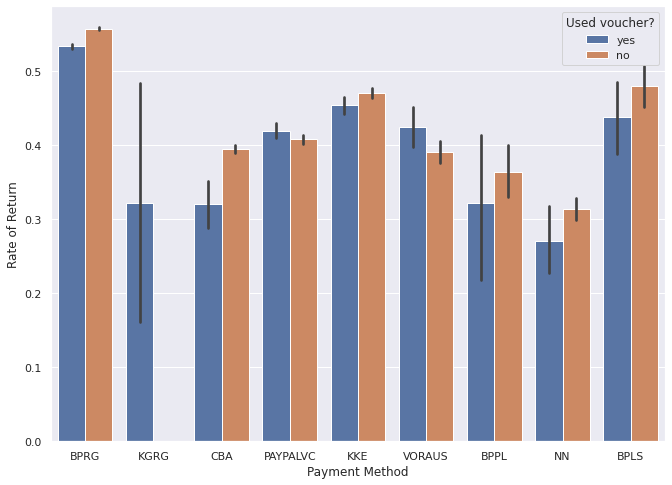

In [ ]:
sns.set(rc = {'figure.figsize':(11,8)})
g=sns.barplot(hue='Used voucher?',y='returned',data=df,x='paymentMethod')
plt.xlabel('Payment Method')
plt.ylabel('Rate of Return')


#Influence of price and rrp to returns

In this visualisation each point represents an unique price rrp pair, since there are multiple rows in the dataframe with the same price and rrp values these points overlap each other. Red means an article was returned and blue mean there was no item returned, and so purple means that both are present.

The points where price=rrp form a diagonal, where the points below the diagonal are articles with a lower price than the rrp, and these contain 'return' and 'no returns' almost equally. The points above the diagonal are mostly returned, which dont necessarily mean that the article was more expensive than usually, but the quantity was higher.

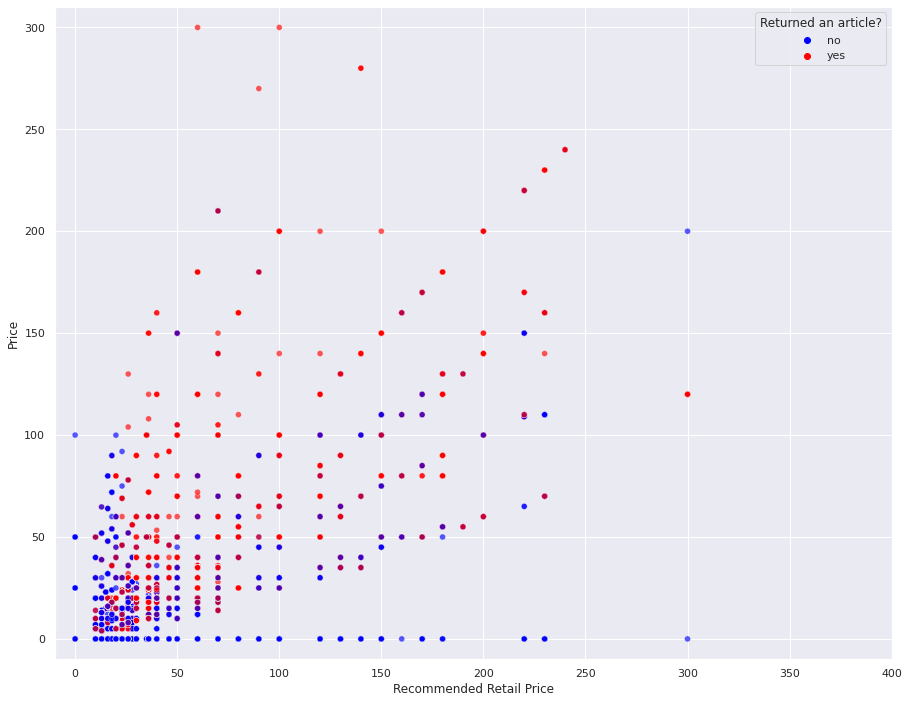

In [ ]:
sns.set(rc={'figure.figsize':(15,12)})
ax=sns.scatterplot(data=df,x='rrp',y='price',hue='returned',alpha=0.65,palette=['blue','red'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['no','yes'], 
          bbox_to_anchor=(1,1), 
          title='Returned an article?')
plt.xlabel('Recommended Retail Price')
plt.ylabel('Price')
plt.xlim(-10,400)
plt.ylim(-10,310)
plt.show()

#Return rate of product groups

Here we see the return rates for the different product groups.
Group 17 have 0 returns but this is most likely due to the low amount of rows with group 17 and has maybe something to do with these rows containg missing values. Group 14 and 15 have really low return rates, so these could be articles like socks, which usually have no reason to be returned. 
On the other side group 5 and 9 the highest rates.

Text(0.5, 0, 'Product Group')

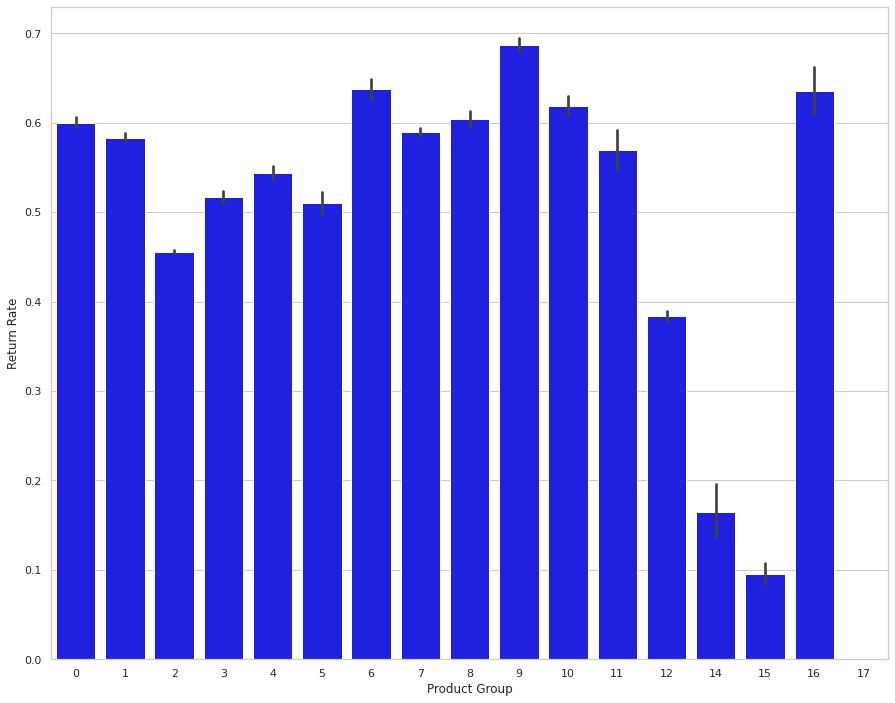

In [ ]:
sns.set_style('whitegrid')
sns.barplot(data=df,x='productGroup',y='returned',palette=['blue'])
plt.ylabel('Return Rate')
plt.xlabel('Product Group')

#Voucher and return behavior depending on the order price

In [ ]:
df_order = df[['orderID','quantity','price','returned']].groupby(['orderID'],as_index=False).sum() # we cant include voucher amount

  
order_voucherdict = dict(zip(df['orderID'],df['voucherAmount']))     # creates a dictionary with order and voucheramount as key -value pair
df_order['voucherAmount'] = df_order['orderID'].map(order_voucherdict) # creates a column which shows the voucher amount that was used in this order 

In [ ]:
df_order['used_voucher'] = df_order['voucherAmount'].apply(lambda x:1 if x>0 else 0)

In [ ]:
df_order['returned'] = df_order['returned'].apply(lambda x:1 if x>0 else 0)
df_order5 = df_order[df_order['voucherAmount']<=150]

In the graphic below each point represents an order. There are 4 constant lines, representing the most common voucher amounts 5, 10, 15 and no voucher.    
An interesting line is the one going from the point (0,0) to (200,20), which acts like some kind of border. The majority of vouchers used was above this line, which means that customers only use vouchers, if it is at least 10% of the value of the total order price, whether it is a restriction of the shop or a descision of the customer is unclear. 

The correlation between increasing numbers and orders containing at least one returned article is not surprising since customers order different similar article, where they only keep a part and return the rest.

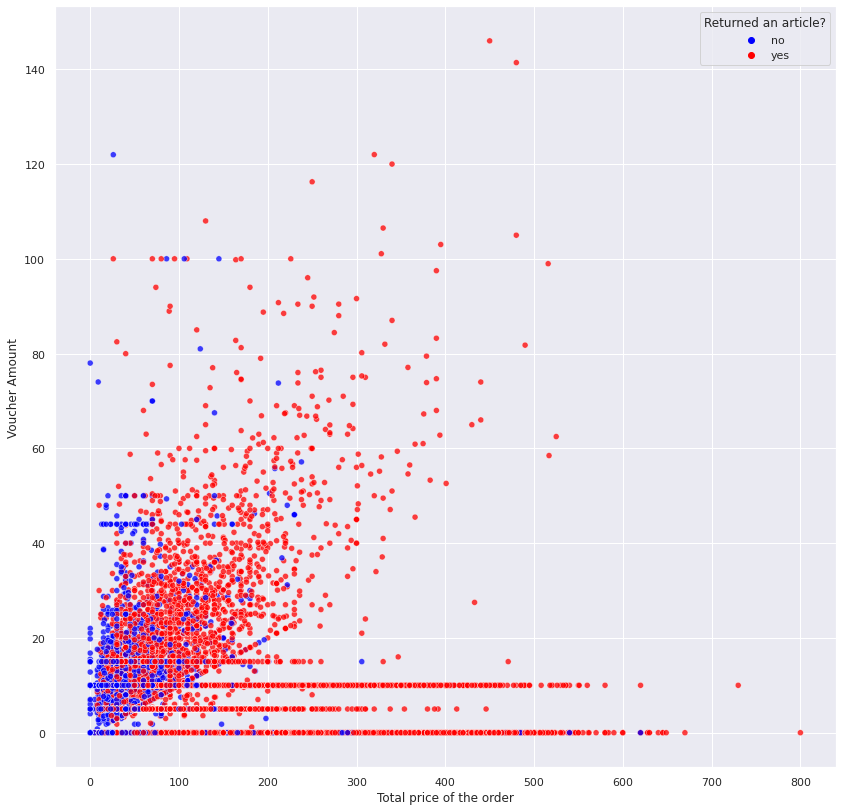

In [ ]:
sns.set(rc={'figure.figsize':(14,14)})
ax2 = sns.scatterplot(x='price',y='voucherAmount',data=df_order5,hue='returned',alpha=0.75,palette=['blue','red'])

legend_labels, _= ax2.get_legend_handles_labels()
ax2.legend(legend_labels, ['no','yes'], 
          bbox_to_anchor=(1,1), 
          title='Returned an article?')

plt.xlabel('Total price of the order')
plt.ylabel('Voucher Amount')
plt.show()

#Total amount of all vouchers used and money spent per customer

In [ ]:
df_customer = df[['customerID','quantity','price','returned']].groupby(['customerID'],as_index=False).sum()


In [ ]:
order_customer_dict = dict(zip(df['orderID'],df['customerID']))  # pairing each orderid with the customerid

In [ ]:
df_order['customerID']=df_order['orderID'].map(order_customer_dict)  # we create a customerID column in the orderID dataframe 

In [ ]:
number_of_orders={}     # we create a dictionary which counts the orders of the customers
for customer in df_customer['customerID']:          
  a=len(df[df['customerID']==customer]['orderID'].unique())     # count the different orders each customer made and pair the amount with customer id  
  number_of_orders[customer]=a      

In [ ]:
df_customer['number_of_orders']=df_customer['customerID'].map(number_of_orders)  # creating a column which shows us the number of orders a customer has made

In [ ]:
number_of_vouchers={}
sum_vouchers={}


for customer in df_order['customerID']:
  dfc=df_order[df_order['customerID']==customer]
  b=sum(dfc['used_voucher'])
  c=sum(dfc['voucherAmount'])  
  

  
  number_of_vouchers[customer]=b
  sum_vouchers[customer]=c

In [ ]:
df_customer['number_of_vouchers']=df_customer['customerID'].map(number_of_vouchers)
df_customer['voucherAmount']=df_customer['customerID'].map(sum_vouchers)

In this graphic each point represents a customer. It is interesting that highest values for vouchers are not from customers who spent the most rather from the ones in the lower third. And also there are some customers who spend a few thousands without using a single voucher.  

Text(0, 0.5, 'Total of all vouchers used')

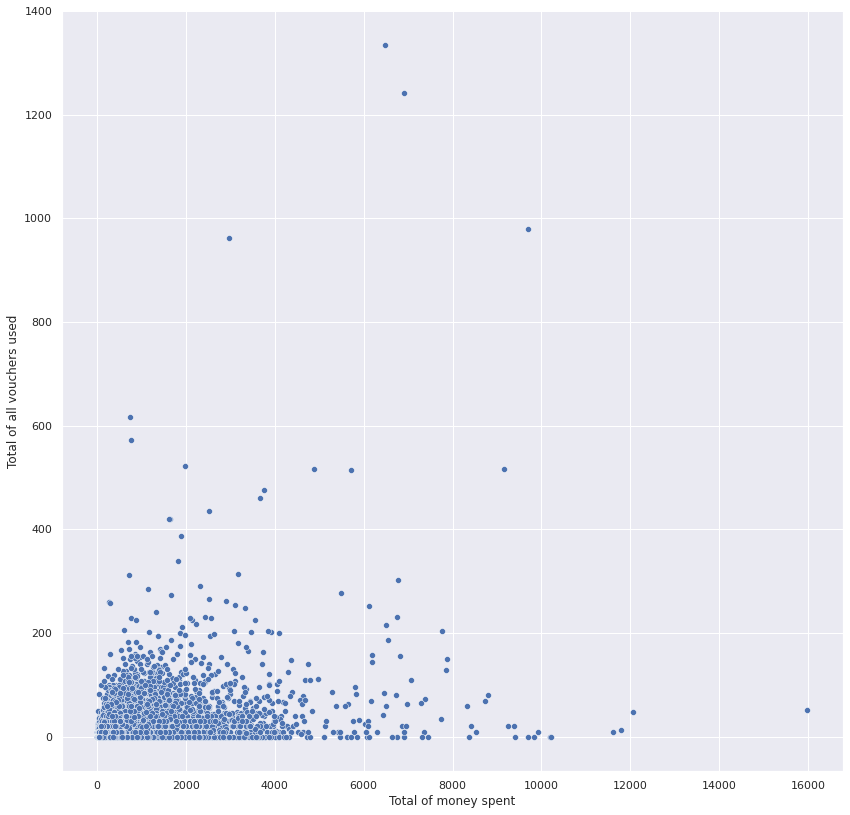

In [ ]:
sns.scatterplot(x='price',y='voucherAmount',data=df_customer)
plt.xlabel('Total of money spent')
plt.ylabel('Total of all vouchers used')

#Other visualisations

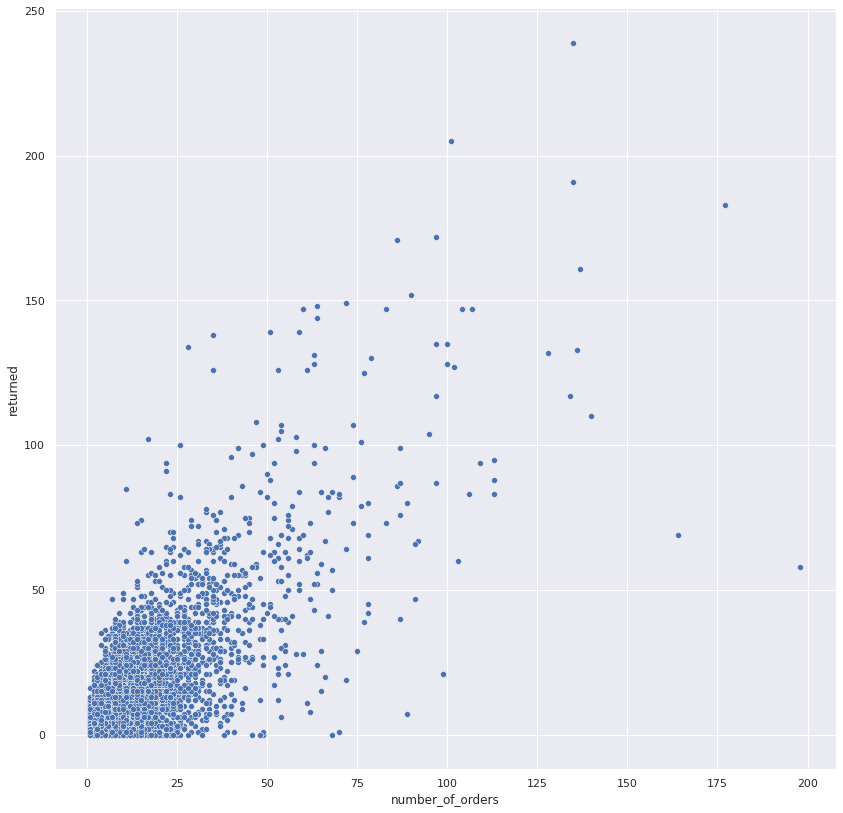

In [ ]:
sns.scatterplot(x='number_of_orders',y='returned',data=df_customer)

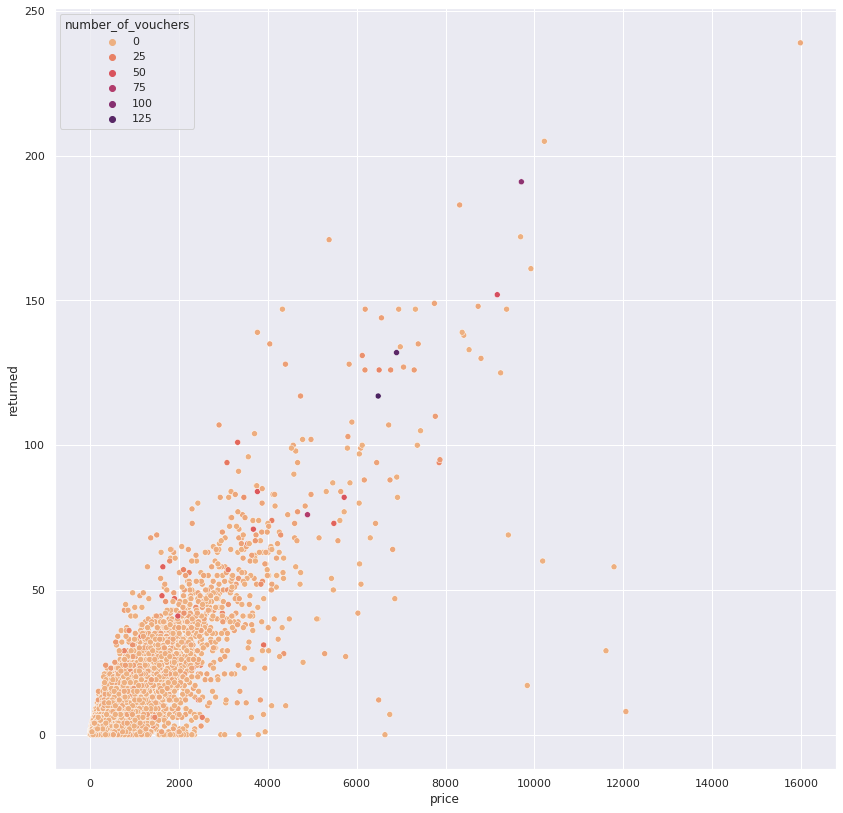

In [ ]:
sns.scatterplot(x='price',y='returned',data=df_customer,hue='number_of_vouchers',palette='flare')

In [ ]:
df_3=df[df['quantity']>0]

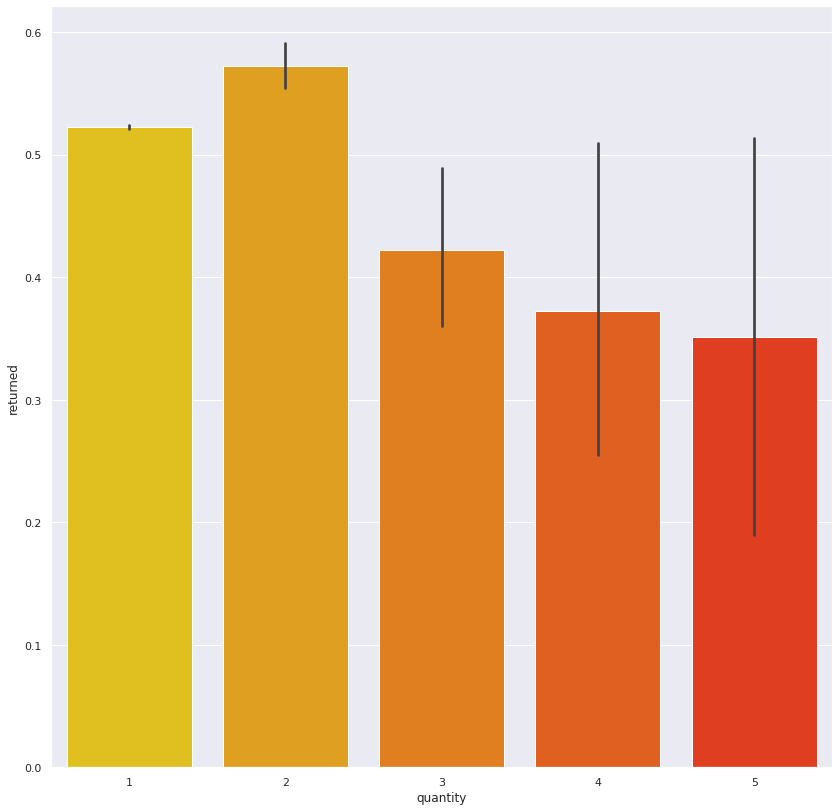

In [ ]:
sns.barplot(data=df_3, x='quantity',y='returned',palette='autumn_r')